# Updating SFRDs: UV data

Thanks to the improvements in observational facilities in the past few years, we were able to compute luminosity function more accurately. We now use this updated measurements of luminosity fucntion to update the values of SFRDs. In the present notebook, we focus on UV luminosity functions, which are described by the classical Schechter function (detailed description can be found in [this](https://github.com/Jayshil/csfrd/blob/main/p1.ipynb) notebook). We assumes the correlation between the Schechter function parameters similar to what observed in Bouwens et al. (2021) --- that means, at any redshift, the correlation assumed to be the same.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as con
import astropy.units as u
from scipy.optimize import minimize as mz
from scipy.optimize import curve_fit as cft
import utils as utl
import os

We have already computed the SFRDs by using [this](https://github.com/Jayshil/csfrd/blob/main/sfrd_all.py) code -- here we only plot the results.

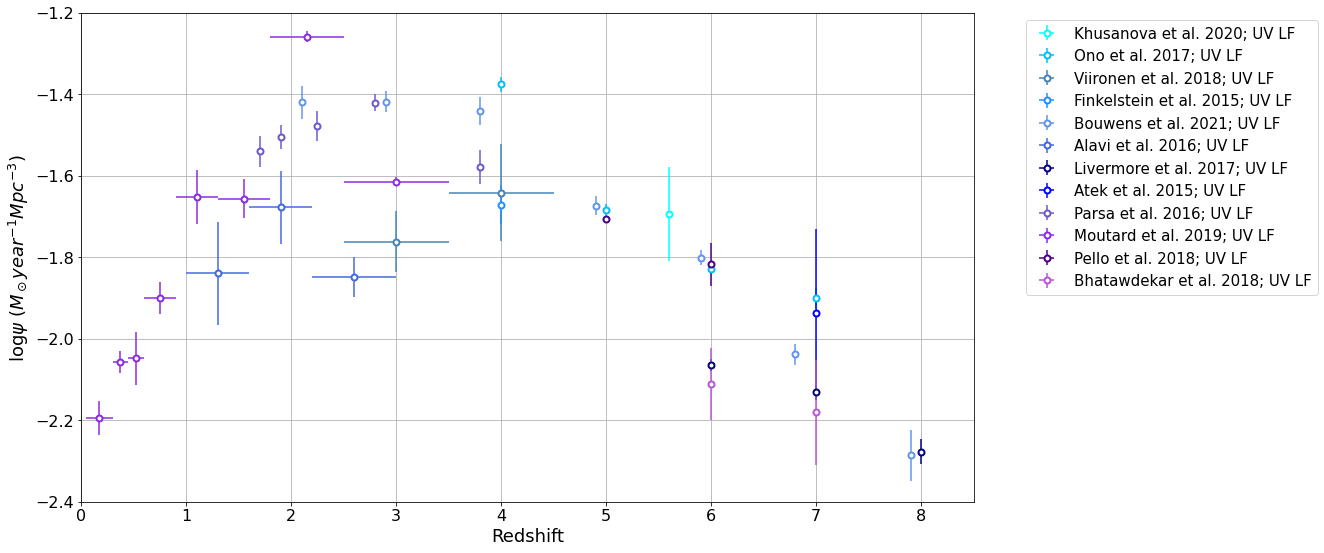

In [8]:
ppr_uv = np.array(['Khusanova_et_al._2020', 'Ono_et_al._2017', 'Viironen_et_al._2018', 'Finkelstein_et_al._2015', 'Bouwens_et_al._2021', 'Alavi_et_al._2016', 'Livermore_et_al._2017', 'Atek_et_al._2015', 'Parsa_et_al._2016', 'Hagen_et_al._2015', 'Moutard_et_al._2019', 'Pello_et_al._2018', 'Bhatawdekar_et_al._2018'])

cols = np.array(['cyan', 'deepskyblue', 'steelblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'navy', 'blue', 'slateblue', 'darkslateblue', 'blueviolet', 'indigo', 'mediumorchid'])

#ppr_uv = np.array(['Khusanova_et_al._2020', 'Ono_et_al._2017', 'Viironen_et_al._2018', 'Finkelstein_et_al._2015', 'Bouwens_et_al._2021', 'Alavi_et_al._2016', 'Livermore_et_al._2017', 'Atek_et_al._2015', 'Parsa_et_al._2016', 'Moutard_et_al._2019', 'Pello_et_al._2018', 'Bhatawdekar_et_al._2018'])

# Loading papers
ppr_uv1 = np.loadtxt('sfrd_uv_new.dat', usecols=0, unpack=True, dtype=str)
zd_uv, zu_uv, sfrd_uv, sfrd_uv_err = np.loadtxt('sfrd_uv_new.dat', usecols=(1,2,3,4), unpack=True)
zcen_uv = (zd_uv + zu_uv)/2
zup, zdo = np.abs(zu_uv - zcen_uv), np.abs(zcen_uv - zd_uv)
log_sfrd_uv, log_sfrd_uv_err = utl.log_err(sfrd_uv, sfrd_uv_err)

plt.figure(figsize=(16, 9))
# Plotting them
for i in range(len(ppr_uv)):
    zc_uv, zp, zn, lg_sf, lg_sfe = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])
    for j in range(len(ppr_uv1)):
        if ppr_uv1[j] == ppr_uv[i]:
            zc_uv = np.hstack((zc_uv, zcen_uv[j]))
            lg_sf = np.hstack((lg_sf, log_sfrd_uv[j]))
            lg_sfe = np.hstack((lg_sfe, log_sfrd_uv_err[j]))
            zp = np.hstack((zp, zup[j]))
            zn = np.hstack((zn, zdo[j]))
    if ppr_uv[i] == 'Hagen_et_al._2015':
        continue
    else:
        plt.errorbar(zc_uv, lg_sf, xerr=[zn, zp], yerr=lg_sfe, c=cols[i], label=ppr_uv[i].replace('_',' ') + '; UV LF', fmt='o', mfc='white', mew=2)

#plt.plot(znew, psi2, label='Best fitted function')
plt.xlabel('Redshift', fontsize= 18)
plt.ylabel(r'$\log{\psi}$ ($M_\odot year^{-1} Mpc^{-3}$)', fontsize= 18)
plt.grid()
plt.ylim([-2.4, -1.2])
plt.xlim([0, 8.5])
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.legend(loc='upper left', fontsize= 15, bbox_to_anchor=(1.05, 1))

Note that, for most of the values, the SFRD is tightly constrained. We again note here that, in this calculation we have assumed that the Schechter function parameters are correlated (except for lower redshifts), and the correlation matrix is according to Bouwens et al. (2021). For lowest redshifts ($z=0$ and $z=1$), we, however, assumed the independency among the Schechter function parameters.

We can now overplot the best fitted function from Madau & Dickinson (2014) on this plot,

$$ \psi(z) = 0.015 \frac{(1+z)^{2.7}}{1 + [(1+z)/2.9]^{5.6}} M_\odot \ year^{-1} Mpc^{-3}$$

Here, the symbols have thir usual meanings.

In [3]:
# Defining best-fitted SFRD

def psi_md(z):
    ab = (1+z)**2.7
    cd = ((1+z)/2.9)**5.6
    ef = 0.015*ab/(1+cd)
    return ef

# Calculating psi(z)
znew = np.linspace(0,9,1000)
psi1 = psi_md(znew)
psi2 = np.log10(psi1)

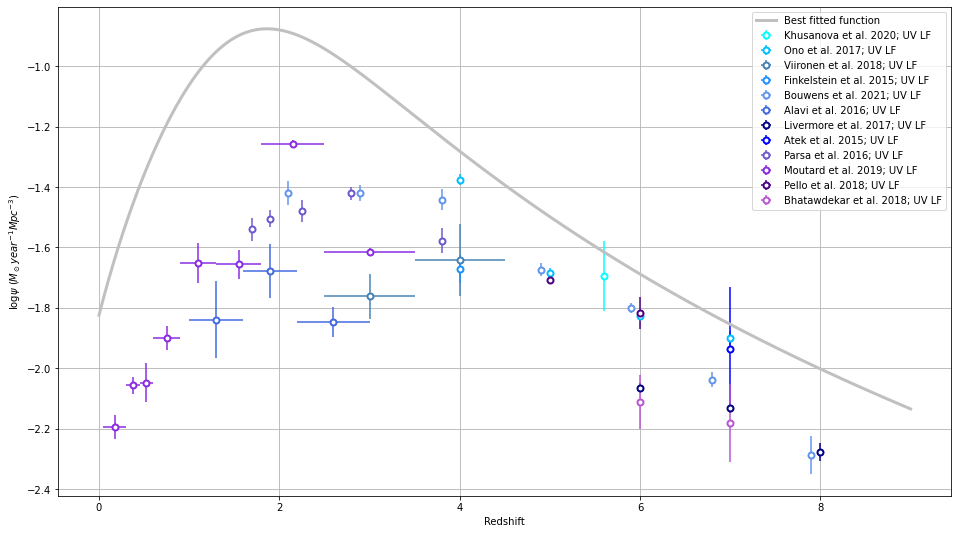

In [4]:
plt.figure(figsize=(16, 9))
# Plotting them
for i in range(len(ppr_uv)):
    zc_uv, zp, zn, lg_sf, lg_sfe = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])
    for j in range(len(ppr_uv1)):
        if ppr_uv1[j] == ppr_uv[i]:
            zc_uv = np.hstack((zc_uv, zcen_uv[j]))
            lg_sf = np.hstack((lg_sf, log_sfrd_uv[j]))
            lg_sfe = np.hstack((lg_sfe, log_sfrd_uv_err[j]))
            zp = np.hstack((zp, zup[j]))
            zn = np.hstack((zn, zdo[j]))
    if ppr_uv[i] == 'Hagen_et_al._2015':
        continue
    else:
        plt.errorbar(zc_uv, lg_sf, xerr=[zn, zp], yerr=lg_sfe, c=cols[i], label=ppr_uv[i].replace('_',' ') + '; UV LF', fmt='o', mfc='white', mew=2)

plt.plot(znew, psi2, label='Best fitted function', lw=3, c='silver')
plt.xlabel('Redshift')
plt.ylabel(r'$\log{\psi}$ ($M_\odot year^{-1} Mpc^{-3}$)')
plt.grid()
plt.legend(loc='best')

It can readily be observed from the above figure that, the best-fitted function from Madau & Dickinson (2014) does not exactly match with our computation of SFRDs, which shows the need to correct for dust in these calculations. However, in the present work, we are not going to take the dust corrections. We shall compute the SFRDs for UV and IR seperately, and then just add them together. Hence, there is no need to fit the exact function to the data. What we do is to make all of the number variable in the best-fitted function from Madau & Dickinson (2014), and try to fit this to the data. Essentially, the function that we want to fit to the data is following:

$$ \psi(z) = A \frac{(1+z)^{B}}{1 + [(1+z)/C]^{D}} M_\odot \ year^{-1} Mpc^{-3}$$

here, $A$, $B$, $C$ and $D$ are variables.

We use `scipy.optimize.minimize` function to perform this task. The idea is to compute the maximum likelihood function.

In [5]:
# New model
def psi_new(z, aa, bb, cc, dd):
    ab = (1+z)**bb
    cd = ((1+z)/cc)**dd
    ef = aa*ab/(1+cd)
    return ef

# Negative likelihood function
def min_log_likelihood(x):
    model = psi_new(zcen_uv, x[0], x[1], x[2], x[3])
    chi2 = (sfrd_uv - model)/sfrd_uv_err
    chi22 = np.sum(chi2**2)
    yy = 0.5*chi22 + np.sum(np.log(sfrd_uv_err))
    return yy

#xinit, pcov = cft(psi_new, zcen_uv, sfrd_uv, sigma=sfrd_uv_err)
#xinit = np.array([0.015, 2.7, 2.9, 5.6])
xinit = np.array([0.01, 3., 3., 6.])
soln = mz(min_log_likelihood, xinit, method='L-BFGS-B')
soln

      fun: 200.57541080952092
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.04509388,  0.00058549,  0.00061391, -0.00040359])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 630
      nit: 97
   status: 0
  success: True
        x: array([0.00603019, 1.36922641, 4.94704344, 5.22416722])

So, the fitting in converged; that's good! Let's see how this new fitting looks like...

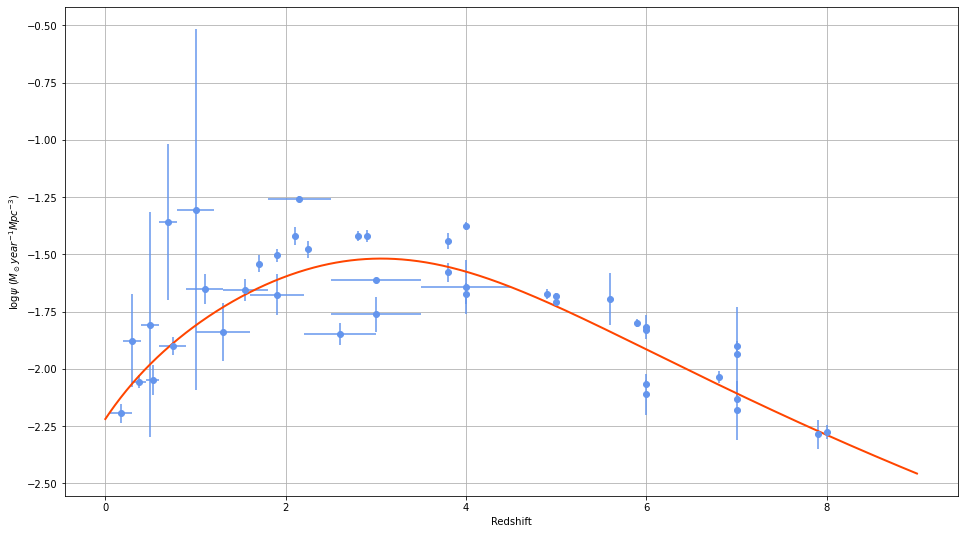

In [6]:
best_fit_fun = psi_new(znew, *soln.x)
log_best_fit = np.log10(best_fit_fun)

plt.figure(figsize=(16,9))
plt.errorbar(zcen_uv, log_sfrd_uv, xerr=[zup, zdo], yerr=log_sfrd_uv_err, fmt='o', c='cornflowerblue')
plt.plot(znew, log_best_fit, label='Best fitted function', lw=2, c='orangered')
plt.xlabel('Redshift')
plt.ylabel(r'$\log{\psi}$ ($M_\odot year^{-1} Mpc^{-3}$)')
plt.grid()

That's sounds about right. Here, the fitted function would be,

$$ \psi(z) = 0.006 \frac{(1+z)^{1.37}}{1 + [(1+z)/4.95]^{5.22}} M_\odot \ year^{-1} Mpc^{-3}$$

We want to make note here though. There are some points present in the plot which have large errorbars. Those are from the paper Hagen et al. (2015). From the quick look at the paper, it seems that, these large errorbars are there because of the large errorbars in $\phi_*$. Anyway, in the following I try to remove those points from the data and see if the shape of the best-fitted function changes or not.

In [7]:
# Loading new data
sfrd1, sfrd_err1 = np.array([]), np.array([])
log_sfrd1, log_sfrd_err1 = np.array([]), np.array([])
zcen1, zdo1, zup1 = np.array([]), np.array([]), np.array([])

for i in range(len(ppr_uv1)):
    if ppr_uv1[i] != 'Hagen_et_al._2015':
        sfrd1 = np.hstack((sfrd1, sfrd_uv[i]))
        sfrd_err1 = np.hstack((sfrd_err1, sfrd_uv_err[i]))
        log_sfrd1 = np.hstack((log_sfrd1, log_sfrd_uv[i]))
        log_sfrd_err1 = np.hstack((log_sfrd_err1, log_sfrd_uv_err[i]))
        zcen1 = np.hstack((zcen1, zcen_uv[i]))
        zdo1 = np.hstack((zdo1, zdo[i]))
        zup1 = np.hstack((zup1, zup[i]))

# Fitting new data
# Negative likelihood function
def min_log_likelihood1(x):
    model = psi_new(zcen1, x[0], x[1], x[2], x[3])
    chi2 = (sfrd1 - model)/sfrd_err1
    chi22 = np.sum(chi2**2)
    yy = 0.5*chi22 + np.sum(np.log(sfrd_err1))
    return yy

#xinit, pcov = cft(psi_new, zcen_uv, sfrd_uv, sigma=sfrd_uv_err)
#xinit = np.array([0.015, 2.7, 2.9, 5.6])
xinit1 = np.array([0.01, 3., 3., 6.])
soln1 = mz(min_log_likelihood1, xinit1, method='L-BFGS-B')
soln1

      fun: 214.66038930452027
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.59349553e-01,  2.31352715e-03, -2.84217094e-05,  5.00222086e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 470
      nit: 70
   status: 0
  success: True
        x: array([0.0060118 , 1.37179621, 4.94514011, 5.22496211])

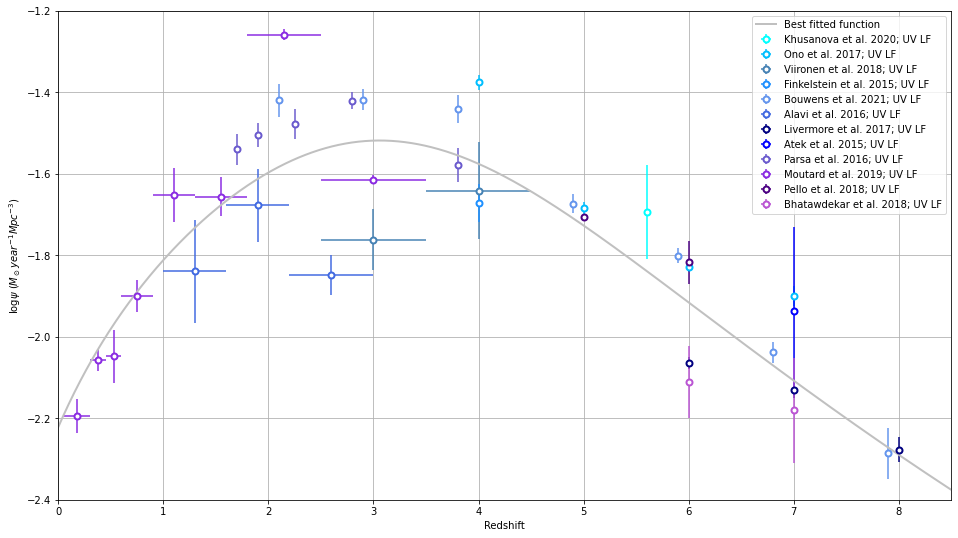

In [8]:
best_fit_fun1 = psi_new(znew, *soln1.x)
log_best_fit1 = np.log10(best_fit_fun1)

plt.figure(figsize=(16,9))
plt.plot(znew, log_best_fit1, label='Best fitted function', lw=2, c='silver')

# Plotting Data
for i in range(len(ppr_uv)):
    zc_uv, zp, zn, lg_sf, lg_sfe = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])
    for j in range(len(ppr_uv1)):
        if ppr_uv1[j] == ppr_uv[i]:
            zc_uv = np.hstack((zc_uv, zcen_uv[j]))
            lg_sf = np.hstack((lg_sf, log_sfrd_uv[j]))
            lg_sfe = np.hstack((lg_sfe, log_sfrd_uv_err[j]))
            zp = np.hstack((zp, zup[j]))
            zn = np.hstack((zn, zdo[j]))
    if ppr_uv[i] == 'Hagen_et_al._2015':
        continue
    else:
        plt.errorbar(zc_uv, lg_sf, xerr=[zn, zp], yerr=lg_sfe, c=cols[i], label=ppr_uv[i].replace('_',' ') + '; UV LF', fmt='o', mfc='white', mew=2)

plt.xlabel('Redshift')
plt.ylabel(r'$\log{\psi}$ ($M_\odot year^{-1} Mpc^{-3}$)')
plt.ylim([-2.4, -1.2])
plt.xlim([0, 8.5])
plt.legend(loc='best')
plt.grid()

Well, it seems that, by removing the values with large errorbars, the function doesn't change much. Its new form is,
$$ \psi(z) = 0.006 \frac{(1+z)^{1.37}}{1 + [(1+z)/4.94]^{5.22}} M_\odot \ year^{-1} Mpc^{-3}$$